In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift

# 示例使用
image1_path = "c.png"
img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
u1, s1, v1 = np.linalg.svd(img1, full_matrices=False)

(364, 364) (364, 466)


(364, 466)


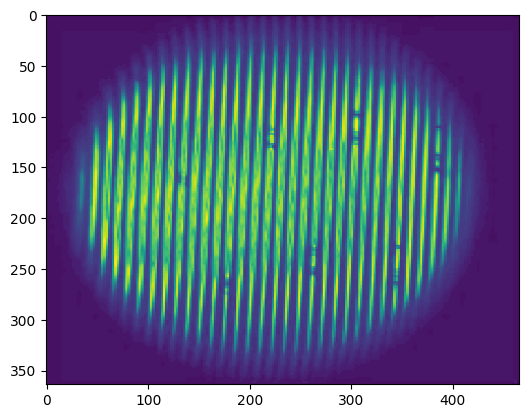

In [55]:
print(img1.shape)
plt.imshow(img1)
plt.show()

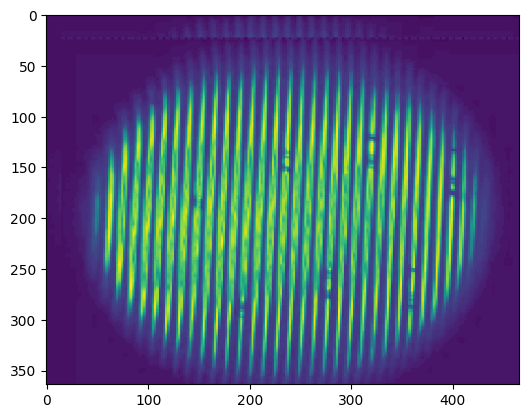

In [77]:
dx_l = 15
dy_l = 23
img2 = np.zeros(img1.shape, dtype=np.uint8)
img2[dy_l:, dx_l:] = img1[:img1.shape[0]-dy_l, :img1.shape[1]-dx_l].copy()
img2[:, :dx_l] = img1[:, :dx_l].copy()
img2[:dy_l, :] = img1[:dy_l, :].copy()
plt.imshow(img2)
plt.show()
u2, s2, v2 = np.linalg.svd(img2, full_matrices=False)

In [73]:
def calc_dxdy(img1, img2):
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
    flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), {})
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    M, _ = cv2.findHomography(points1, points2, cv2.RANSAC)
    dx, dy, _ = M[:, -1]
    return int(dx), int(dy)

In [80]:
dx, dy = calc_dxdy(img1, img2)
print(dx, dy)

15 23


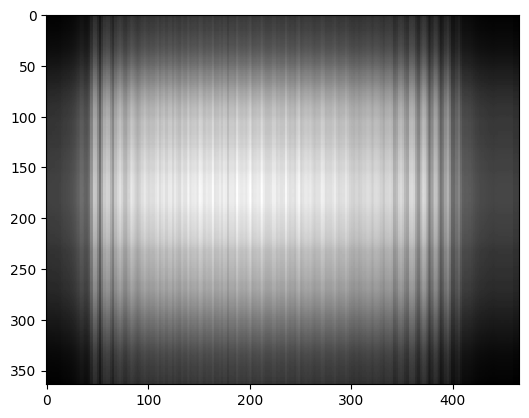

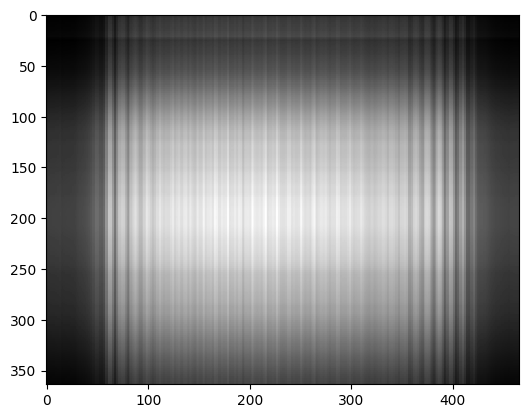

In [78]:
k1=0
k2=1
img1_r = np.dot(u1[:, k1:k2], np.dot(np.diag(s1[k1:k2]), v1[k1:k2, :]))
img2_r = np.dot(u2[:, k1:k2], np.dot(np.diag(s2[k1:k2]), v2[k1:k2, :]))
plt.imshow(img1_r, cmap='gray')
plt.show()
plt.imshow(img2_r, cmap='gray')
plt.show()

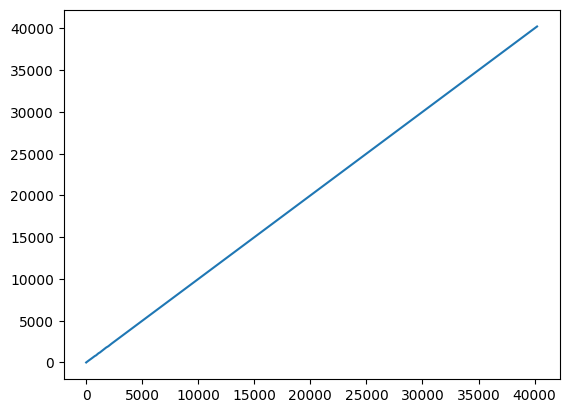

In [79]:
plt.plot(s1, s2)
plt.show()

In [84]:
a = np.array([
    [np.nan, np.nan, np.nan, np.nan, 1.2, 2.3, np.nan, np.nan,np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1.25, 1.2, 2.3, np.nan, np.nan,np.nan, np.nan],
    [np.nan, np.nan, np.nan, 5.1, 1.2, 2.3, 2.21, np.nan,np.nan, np.nan],
    [np.nan, np.nan, 4.444, 4.444, 1.2, 2.3, 4.44, 5.111,np.nan, np.nan],
    [np.nan, np.nan, np.nan, np.nan, 1.2, 2.3, 2.12, np.nan,np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1.12, 1.2, 2.3, np.nan, np.nan,np.nan, np.nan],
    [np.nan, np.nan, np.nan, np.nan, 1.2, 2.3, np.nan, np.nan,np.nan, np.nan],
])

In [95]:
a

array([[  nan,   nan,   nan,   nan, 1.2  , 2.3  ,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 1.25 , 1.2  , 2.3  ,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 5.1  , 1.2  , 2.3  , 2.21 ,   nan,   nan,
          nan],
       [  nan,   nan, 4.444, 4.444, 1.2  , 2.3  , 4.44 , 5.111,   nan,
          nan],
       [  nan,   nan,   nan,   nan, 1.2  , 2.3  , 2.12 ,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 1.12 , 1.2  , 2.3  ,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan, 1.2  , 2.3  ,   nan,   nan,   nan,
          nan]])

In [96]:
def get_lines(spt_trs, num=5):
    loop_num = len(spt_trs) - num
    for i in range(loop_num):
        len_left = (~np.isnan(spt_trs[0])).sum();print(len_left)
        len_right = (~np.isnan(spt_trs[-1])).sum();print(len_right)
        if len_left < len_right:
            spt_trs = np.delete(spt_trs, 0, axis=0)
        else:
            spt_trs = np.delete(spt_trs, -1, axis=0)
    return spt_trs

In [97]:
b = get_lines(a.copy(), 5) 

2
2
2
3


In [100]:
b

array([[  nan,   nan,   nan, 1.25 , 1.2  , 2.3  ,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 5.1  , 1.2  , 2.3  , 2.21 ,   nan,   nan,
          nan],
       [  nan,   nan, 4.444, 4.444, 1.2  , 2.3  , 4.44 , 5.111,   nan,
          nan],
       [  nan,   nan,   nan,   nan, 1.2  , 2.3  , 2.12 ,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 1.12 , 1.2  , 2.3  ,   nan,   nan,   nan,
          nan]])

In [ ]:
# ref
# http://lab.cntl.kyutech.ac.jp/~nishida/paper/2014/RSJ2014/1J3-04.pdf
# http://yokoya.naist.jp/paper/datas/491/9451073.pdf
# https://www.sicara.fr/blog-technique/2019-07-16-image-registration-deep-learning
# https://qiita.com/suuungwoo/items/9598cbac5adf5d5f858e
# http://journal.ucas.ac.cn/EN/10.7523/j.issn.2095-6134.2019.01.014
# https://onlinelibrary.wiley.com/doi/epdf/10.1002/int.4550010303
# https://www.youtube.com/watch?v=MJAvyt9v0g4